# Método de la curva de respuesta. Método de Cohen y Coon

Una vez seleccionado el controlador que se va a utilizar para el lazo de retroalimentación es necesario dar valores a los parámetros del mismo para completar el diseño, es lo que se conoce como realizar la sintonía del controlador. Para la selección se puede recurrir a métodos semiempíricos como es el método de Cohen y Coon o el método de Ziegler-Nichols, que se trata en el siguiente apartado.

El método de Cohen y Coon se le conoce también como método de la curva de reacción del proceso. Para ponerlo en práctica hay que abrir el bucle de retroalimentación desconectando el elemento final de control REFERENCIA FIG 9.1.

Una vez abierto se produce un cambio en escalón de altura $A$ en la variable $c (t)$, que actúa sobre el elemento final de control. Se registra el valor medido de la variable controlada $y_m (t)$ respecto al tiempo. De esta manera se obtiene la curva de respuesta del proceso (CRP). La función de transferencia que relaciona la variación de la
entrada, $c(s)$, y la respuesta, $y_m (s)$, es:

$$G_{\mathrm{CRP}} = \frac{y_m (s)}{c (s)} \approx G_f G_p G_m$$

Esta función de transferencia no solo depende de la dinámica del proceso, también incluye a aquellos elementos que pueda haber entre la entrada y la salida. Típicamente incluirá al elemento final de control y al medidor, aunque puede haber otros elementos.

```{figure} ./img/0.png
---
figclass: margin
align: left
---
Lazo de retroalimentación abierto para introducir un escalón al elemento final de control.
```

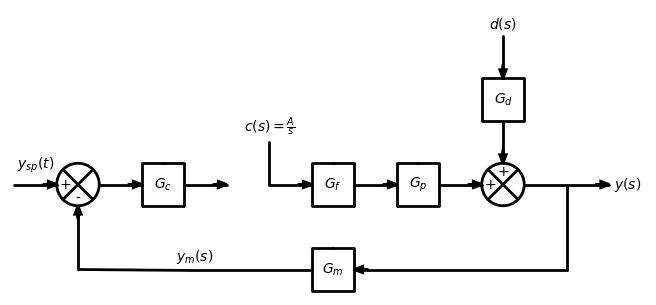

In [27]:
using PyCall, LaTeXStrings

schemdraw = pyimport("schemdraw")
dsp = pyimport("schemdraw.dsp")

d = schemdraw.Drawing(unit=1, fontsize=10)

d.add(dsp.Arrow().right().label(L"y_{sp}(t)"))
comp = d.add(dsp.Mixer(S="-", W="+").anchor("W"))
d.add(dsp.Arrow().right().at(comp.E))
control = d.add(dsp.Box(h=1, w=1).label(L"G_c").anchor("W"))
d.add(dsp.Arrow().right().at(control.E))

fantasma = d.add(dsp.Box(h=1, w=1).anchor("W").linewidth(0))

d.push()
d.add(dsp.Line().up().label(L"c(s)=\frac{A}{s}", "right").at(fantasma.E))
d.add(dsp.Arrow().right().at(fantasma.E))
efc = d.add(dsp.Box(h=1, w=1).label(L"G_f").anchor("W"))
d.add(dsp.Arrow().right().at(efc.E))
proc = d.add(dsp.Box(h=1, w=1).label(L"G_p").anchor("W"))
d.add(dsp.Arrow().right().at(proc.E))
suma = d.add(dsp.Mixer(W="+", N="+").anchor("W"))
d.push()
d.add(dsp.Arrow().up().reverse().at(suma.N))
dist = d.add(dsp.Box(h=1, w=1).label(L"G_d").anchor("S"))
d.add(dsp.Arrow().up().reverse().at(dist.N).label(L"d(s)", "right"))
d.pop()
d.add(dsp.Line().right().at(suma.E))
dot = d.add(dsp.Dot(radius=0))
d.push()
d.add(dsp.Arrow().right().label(L"y(s)", "right").at(dot.center))
d.pop()
d.add(dsp.Line().down().length(2).at(dot.center))
d.add(dsp.Arrow().left().length(5))
sensor = d.add(dsp.Box(h=1, w=1).label(L"G_m").anchor("E"))
d.add(dsp.Line().left().at(sensor.W).tox(comp.S).label(L"y_m(s)"))
d.add(dsp.Arrow().up().to(comp.S))

d.draw(show=false)

Cohen y Coon observaron que la mayoría de procesos presentaban un CRP de aspecto parecido a una sigmoide, que se podía aproximar a un proceso de primer orden con un retraso:

$$G_{\mathrm{CRP}} = \frac{y_m (s)}{c (s)} \approx \frac{K}{\tau s + 1}
   \mathrm{e}^{- t_d s}$$

donde $K$, $\tau$ y $t_d$ se determinan a partir del análisis de la curva de respuesta del proceso REFERENCIA FIG9.2:

```{figure} ./img/0.png
---
figclass: margin
align: left
---
Análisis gráfico de la curva de respuesta del proceso.
```

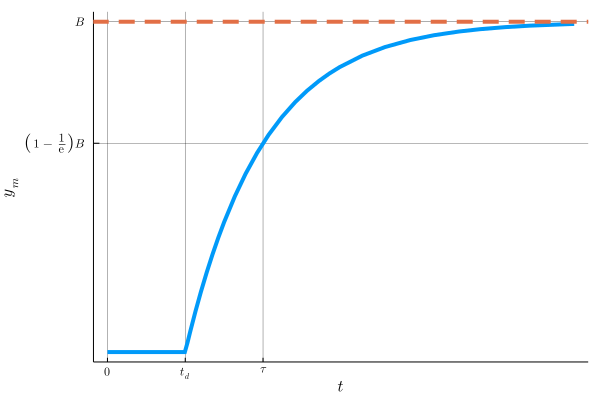

In [65]:
using Plots, SymPy

@syms t, s

G = 1/(s+1)*exp(-s)
c = 1/s
ym = sympy.inverse_laplace_transform(G*c, s, t)

plot(ym, 0, 6, lw=4, legend=false,
    xlabel=L"t", ylabel=L"y_m", gridalpha=0.6,
    xticks=([0,1, 2],[L"0", L"t_d", L"\tau"]),
    yticks=([1-1/exp(1),1], [L"\left(1-\frac{1}{\mathrm{e}}\right) B", L"B"]))
hline!([1], lw=4, linestyle=:dash)

$$\begin{aligned}
  K &= \frac{B}{A} = \frac{\text{Salida en estado estacionario}}{\text{Entrada en estado estacionario}} \\
  \tau &= \left(1-\frac{1}{\mathrm{e}}\right) B\\
  t_d &= \text{Tiempo transcurrido hasta que el sistema responde}
\end{aligned}$$

Para realizar la sintonía del controlador se recurre a las siguientes
ecuaciones:

1.  Controladores P:

    $$K_c = \frac{1}{K}  \frac{\tau}{t_d}  \left( 1 + \frac{t_d}{3 \tau}
         \right)$$

2.  Controladores PI:

    $$\begin{aligned}
        K_c &= \frac{1}{K}  \frac{\tau}{t_d}  \left( 0.9 + \frac{t_d}{12 \tau}
        \right)\\
        \tau_I &= t_d  \frac{30 + 3 \frac{t_d}{\tau}}{9 + 20 \frac{t_d}{\tau}}
      \end{aligned}$$

3.  Controladores PID:

    $$\begin{aligned}
        K_c &= \frac{1}{K}  \frac{\tau}{t_d}  \left( \frac{4}{3} + \frac{t_d}{4
        \tau} \right)\\
        \tau_I &= t_d  \frac{32 + 6 \frac{t_d}{\tau}}{13 + 8 \frac{t_d}{\tau}}\\
        \tau_D &= t_d  \frac{4}{11 + 2 \frac{t_d}{\tau}}
      \end{aligned}$$